<a href="https://colab.research.google.com/github/nitshuga/coderhouse-datascience/blob/main/Proyecto_Final_Agustin_Torres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ESTADISTICAS DE JUEGO DE LA NBA**

**proyecto final comisión 42365 data science**

*Agustín Torres*


#**Introducción**

El conjunto de datos utilizado contiene información detallada de cada partido disputado en las últimas 6 temporadas que es una fuente indispensable a la hora de analizar y preparar los partidos desde los diferentes puntos de vista que la propia audiencia pueda requerir.

La motivación está en disponibilizar informacion detallada de cada juego disputado y cada una de las estadisticas por equipo para facilitar el analisis y el entendimiento del basquet.

La audiencia alcanza a entrenadores, periodistas, manager que son los encargadores de analizar los distintos aspectos del juego, entender los puntos fuertes y debiles de cada equipo, etc. Pero tambien alcanza al público en general o aficionados a las apuestas.

# **Objetivo**

El objetivo principal de este análisis es  utilizar los datos historicos para predecir el resultado de un partido.

Para conseguirlo debemos comprender cuales son los aspectos claves de cada partido


#**Contexto comercial**

En el basquet, como en la mayoria de los deportes colectivos, donde un equipo se enfrenta a otro existen diferentes estilos de juego, donde cada uno tiene sus fortalezas y debilidades.
Por lo que las variables de juego claves pueden ser diferentes para cada equipo y en cada temporada,

La empresa de apuestas Easy Money nos contrato para desarrollar un modelo de datos que permita ajustar las probabilidades en las que basan su sistema de  recompensas

# **Problema comercial**
Dado un equipo podemos identificar cuales son los aspectos del juego que mas determinan los partidos que se ganan y los que se pierden?

Podemos construir un modelo que clasifique si un partido se gano o perdio solo teniendo en cuenta las estadisticas propias, sin conocer las del rival?

Podemos construir un modelo que calcule la probabilidad de ganar un partido teniendo en cuenta las estadisticas de los partidos anteriores?

#**Contexto analitico**

---
El departamento de estadisticas nos provee un dataset con resultados de los partidos de las ultimas 6 temporadas y con las estadisticas de ambos en equipo en cada juego

Las estadisticas las podemos dividir en dos grupos:
1. Ofensivas: todas las variables relacionadas con generar puntos a favor:
  - Asistencias
  - Puntos
  - Efectividad tiros de cancha (triples, dobles y simples)
  - Triples
  - Rebotes ofensivos
2. Defensivas: todas las variables relacionadas con la obtencion de poseciones sin recibir puntos en contra
  - Bloqueos
  - Rebotes defensivos
  - Recuperos
  - Robos de pelota

# Importar librerias necesarias durante el proyecto

In [1]:
# Instalo lo necesario para la optimización de hiperparámetros
! pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from skopt.space import Categorical
import warnings

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm

import time


import seaborn as sns;sns.set_style("whitegrid")

from sklearn.calibration import CalibratedClassifierCV

#**Analisis exploratorio de datos**

## Preparacion de los datos

### Variables utilizadas


---
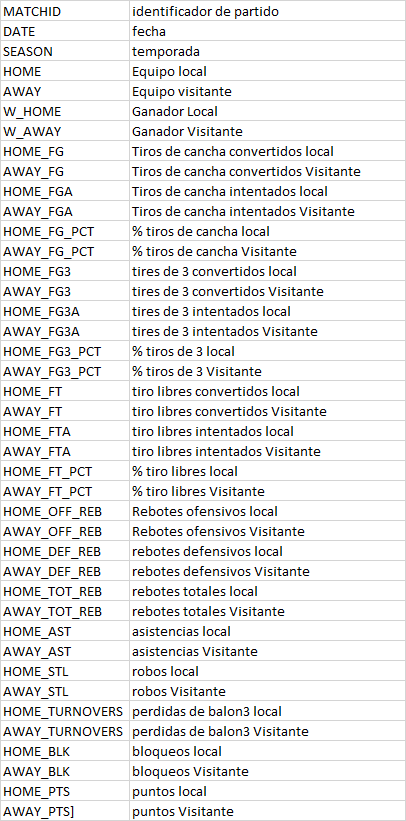

### Importar datos

In [3]:
# Conectando Colab con Google Drive
drive.mount("micarpeta", force_remount=True)

Mounted at micarpeta


In [4]:
filepath="/content/micarpeta/MyDrive/Coder house - Data Scientist/Proyecto FInal/Data/"
nba_df= pd.read_csv(filepath+"game_scores.csv")
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7059 non-null   int64  
 1   MATCHID         7059 non-null   int64  
 2   DATE            7059 non-null   object 
 3   SEASON          7059 non-null   object 
 4   HOME            7059 non-null   object 
 5   AWAY            7059 non-null   object 
 6   W_HOME          7059 non-null   int64  
 7   W_AWAY          7059 non-null   int64  
 8   HOME_FG         7059 non-null   int64  
 9   AWAY_FG         7059 non-null   int64  
 10  HOME_FGA        7059 non-null   int64  
 11  AWAY_FGA        7059 non-null   int64  
 12  HOME_FG_PCT     7059 non-null   float64
 13  AWAY_FG_PCT     7059 non-null   float64
 14  HOME_FG3        7059 non-null   int64  
 15  AWAY_FG3        7059 non-null   int64  
 16  HOME_FG3A       7059 non-null   int64  
 17  AWAY_FG3A       7059 non-null   i

In [5]:
nba_df['DATE'] = pd.to_datetime(nba_df['DATE'], format="%m/%d/%Y")
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7059 non-null   int64         
 1   MATCHID         7059 non-null   int64         
 2   DATE            7059 non-null   datetime64[ns]
 3   SEASON          7059 non-null   object        
 4   HOME            7059 non-null   object        
 5   AWAY            7059 non-null   object        
 6   W_HOME          7059 non-null   int64         
 7   W_AWAY          7059 non-null   int64         
 8   HOME_FG         7059 non-null   int64         
 9   AWAY_FG         7059 non-null   int64         
 10  HOME_FGA        7059 non-null   int64         
 11  AWAY_FGA        7059 non-null   int64         
 12  HOME_FG_PCT     7059 non-null   float64       
 13  AWAY_FG_PCT     7059 non-null   float64       
 14  HOME_FG3        7059 non-null   int64         
 15  AWAY

### Valores nulos
---
Se verifica que el dataset seleccionado no contiene datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7059 non-null   int64         
 1   MATCHID         7059 non-null   int64         
 2   DATE            7059 non-null   datetime64[ns]
 3   SEASON          7059 non-null   object        
 4   HOME            7059 non-null   object        
 5   AWAY            7059 non-null   object        
 6   W_HOME          7059 non-null   int64         
 7   W_AWAY          7059 non-null   int64         
 8   HOME_FG         7059 non-null   int64         
 9   AWAY_FG         7059 non-null   int64         
 10  HOME_FGA        7059 non-null   int64         
 11  AWAY_FGA        7059 non-null   int64         
 12  HOME_FG_PCT     7059 non-null   float64       
 13  AWAY_FG_PCT     7059 non-null   float64       
 14  HOME_FG3        7059 non-null   int64         
 15  AWAY

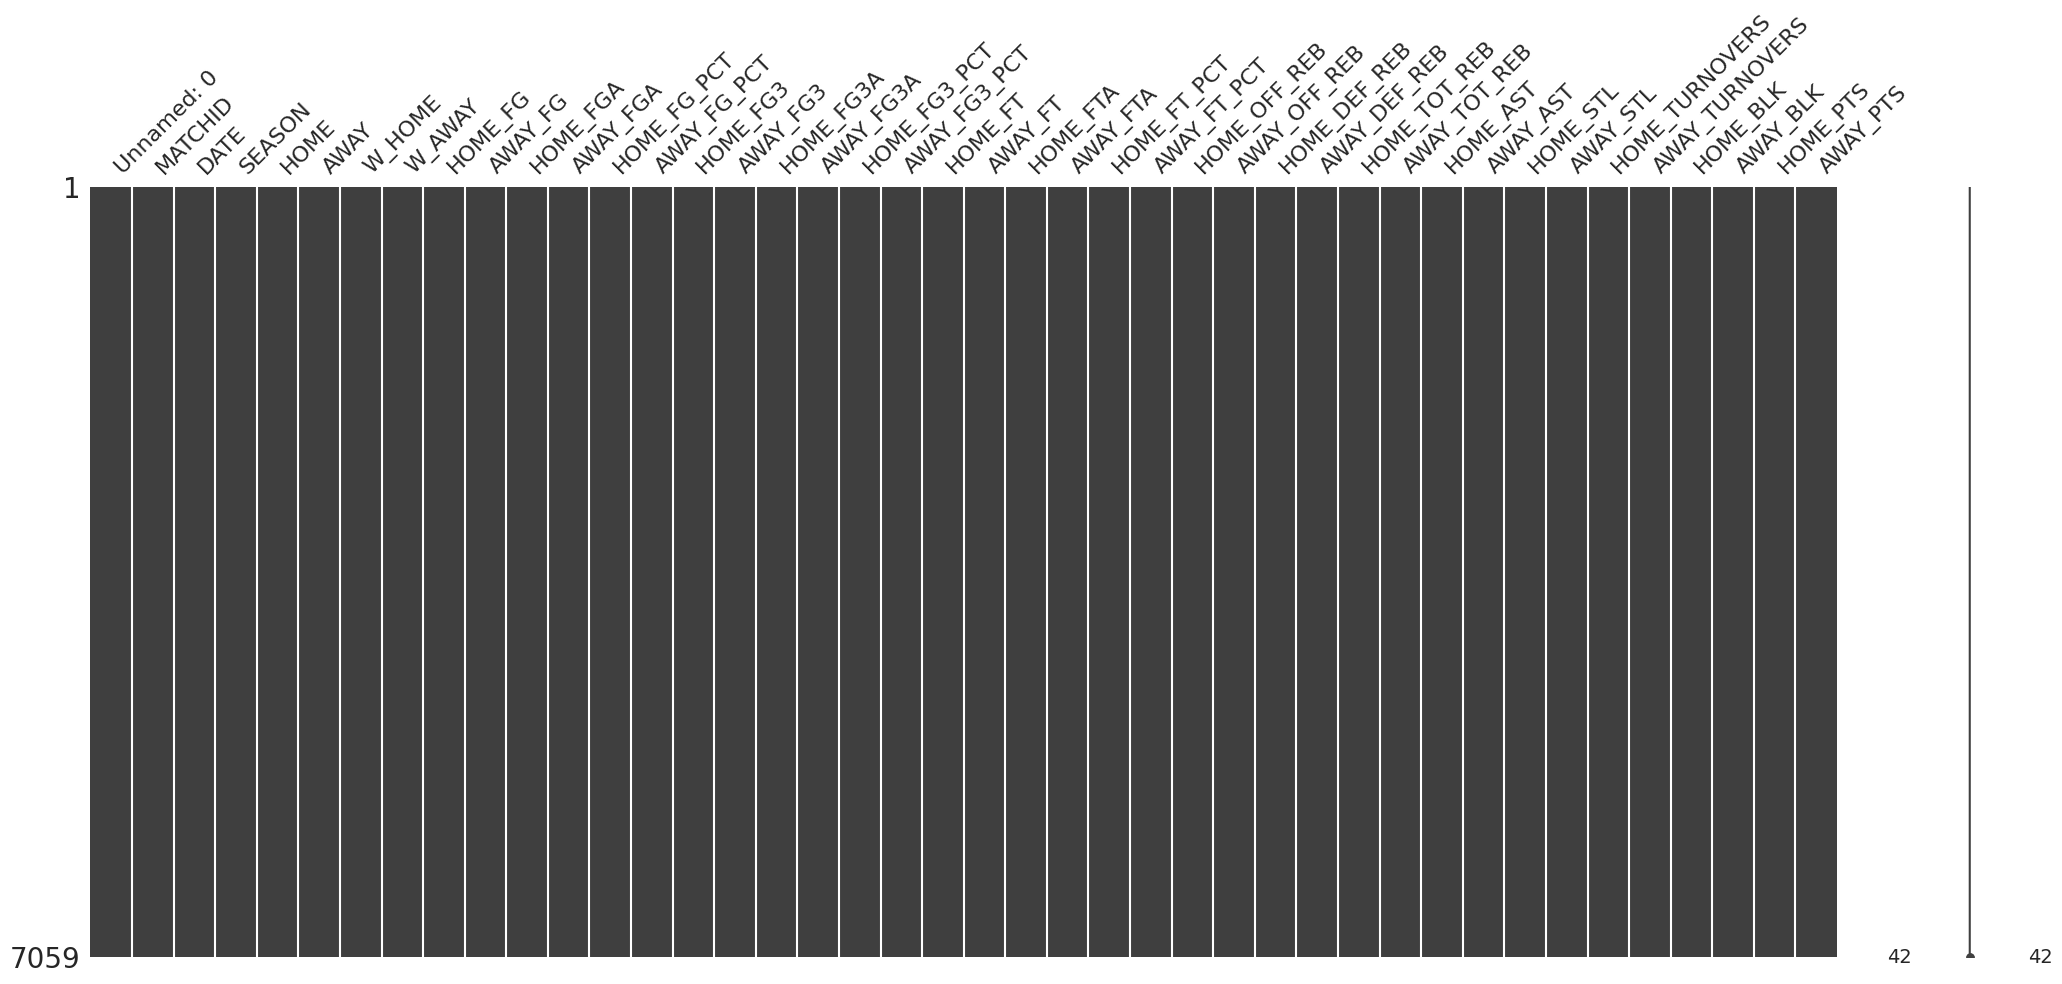

In [6]:
import missingno as msno
msno.matrix(nba_df)
nba_df.info()

### Valores duplicados
---
Vamos a verificar que no haya mas de un registro por equipo y por dia en el dataset.
Teniendo en cuenta que tampoco haya ningun equipo que el mismo dia haya jugado un partido como local y otro como visitante

In [7]:
#seleccionamos las fechas de los partidos y el equipo que jugó de local
games_home=nba_df[['DATE', 'HOME', 'MATCHID']]
games_home.columns=['DATE', 'TEAM', 'MATCHID']
#seleccionamos las fechas de los partidos y el equipo que jugó de visitante
games_away=nba_df[['DATE', 'AWAY', 'MATCHID']]
games_away.columns=['DATE', 'TEAM', 'MATCHID']
#unimos ambos datasets
games=pd.concat([games_home, games_away])
#agrupamos y controlamos que no exista ningun registro duplicado
games_per_day_team=games.groupby(['DATE', 'TEAM']).count()
games_per_day_team[games_per_day_team.MATCHID>1]

,,MATCHID
DATE,TEAM,


## Examen grafico variables

## Analizar correlaciones

### Verificamos Correlacion entre las variables

### Matriz de correlacion

---

Para identificar las variables que mas influyen en el resultado del partido utilizaremos una matriz de correlacion

In [8]:
# cargar datos para el entrenamiento del modelo

#estadisticas del local
columnas_home=nba_df.columns[nba_df.columns.str.contains('HOME')]
home_stats=nba_df[columnas_home]
home_stats.columns=home_stats.columns.str.replace('HOME','TEAM')
home_stats['HOME']=1

#estadisticas del visitante
columnas_away=nba_df.columns[nba_df.columns.str.contains('AWAY')]
away_stats=nba_df[columnas_away]
away_stats.columns=away_stats.columns.str.replace('AWAY','TEAM')
away_stats['HOME']=0

#estadisticas por equipo totales
team_stats=pd.concat([home_stats, away_stats])

<ipython-input-8-bab14399836c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_stats['HOME']=1
<ipython-input-8-bab14399836c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_stats['HOME']=0


In [9]:
correlation_matrix=team_stats.corr()
print(correlation_matrix[['W_TEAM', 'TEAM_PTS', 'TEAM_FG_PCT', 'TEAM_DEF_REB']])

                  W_TEAM  TEAM_PTS  TEAM_FG_PCT  TEAM_DEF_REB
W_TEAM          1.000000  0.461828     0.443053      0.369099
TEAM_FG         0.389159  0.848649     0.785505      0.096942
TEAM_FGA       -0.032695  0.291337    -0.215056      0.134423
TEAM_FG_PCT     0.443053  0.717936     1.000000      0.012417
TEAM_FG3        0.258902  0.519280     0.290089      0.052366
TEAM_FG3A       0.001550  0.187657    -0.162415      0.058554
TEAM_FG3_PCT    0.350595  0.531197     0.540843      0.016031
TEAM_FT         0.131236  0.300682    -0.039548      0.034368
TEAM_FTA        0.095511  0.253453    -0.053441      0.044626
TEAM_FT_PCT     0.113552  0.168208     0.030166     -0.014399
TEAM_OFF_REB   -0.007101  0.030401    -0.326200      0.007642
TEAM_DEF_REB    0.369099  0.112105     0.012417      1.000000
TEAM_TOT_REB    0.250750  0.072664    -0.245614      0.728781
TEAM_AST        0.302198  0.584096     0.558315      0.081417
TEAM_STL        0.124199  0.067060    -0.005583     -0.164240
TEAM_TUR

<ipython-input-9-641289dc8a00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=team_stats.corr()


# **Hipotesis**

---
Algunas preguntas e hipotesis de interes
1. ¿Tener mayor efectividad en tiros de campos (FG_PCT) aumenta la posibilidad de ganar un partido?
2. ¿Que relacion existe entre los rebotes defensivos, las perdidas de pelota y la posibilidad de ganar un partido?
3. ¿Existe alguna cantidad de puntos que me asegure una victoria?


## 1. ¿Tener mayor efectividad en tiros de campos (FG_PCT) aumenta la posibilidad de ganar un partido?
se puede ver en cada temporada que cuando un equipo tiene mas efectividad que su adversario la posibilidad de ganar el partido

<Axes: xlabel='DIFF_FG_PCT', ylabel='SEASON'>

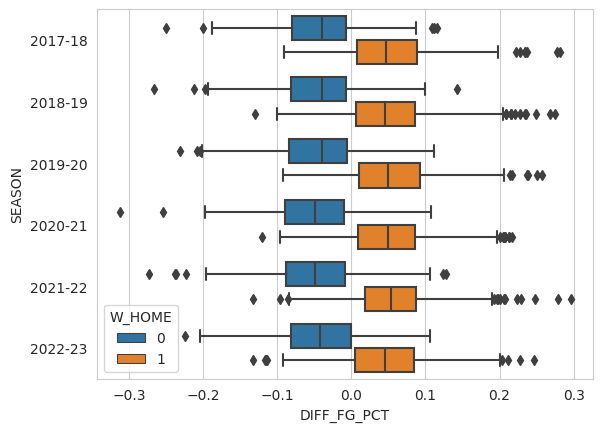

In [10]:
nba_df["DIFF_FG_PCT"]=nba_df["HOME_FG_PCT"]-nba_df["AWAY_FG_PCT"]
nba_df["DIFF_PTS"]=nba_df["HOME_PTS"]-nba_df["AWAY_PTS"]
nba_df["DIFF_DEF_REB"]=nba_df["HOME_DEF_REB"]-nba_df["AWAY_DEF_REB"]
nba_df["DIFF_OFF_REB"]=nba_df["HOME_OFF_REB"]-nba_df["AWAY_OFF_REB"]

sns.boxplot(data=nba_df, x="DIFF_FG_PCT", y="SEASON", hue="W_HOME")


## ¿Que relacion existe entre los rebotes defensivos, las perdidas de pelota y la posibilidad de ganar un partido?

Cuando un equipo tiene mayor rebotes defensivos y menor cantidad de perdida resulta el ganador del partido

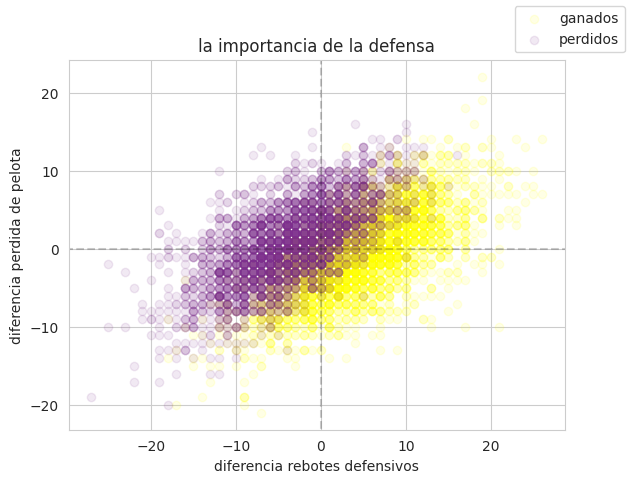

In [11]:
# partidos donde gano el local
home_winers=nba_df[nba_df.W_HOME==1]

# partidos donde gano el visitante
away_winers=nba_df[nba_df.W_AWAY==1]

fig, ax = plt.subplots()
ax.scatter(
    home_winers['HOME_DEF_REB']-home_winers['AWAY_DEF_REB'],
    home_winers['HOME_TURNOVERS']-home_winers['AWAY_TURNOVERS'],
    c='yellow',
    alpha=0.1
  )
ax.scatter(
    away_winers['HOME_DEF_REB']-away_winers['AWAY_DEF_REB'],
    away_winers['HOME_TURNOVERS']-away_winers['AWAY_TURNOVERS'],
    c='#7E2F8E',
    alpha=0.1
  )
ax.axhline(y=0, xmin=-20, xmax=20, color='black', alpha=0.2,linestyle='--')
ax.axvline(x=0, ymin=-20, ymax=20, color='black', alpha=0.2,linestyle='--')
ax.set_title('la importancia de la defensa')
ax.set_xlabel('diferencia rebotes defensivos')
ax.set_ylabel('diferencia perdida de pelota')
fig.legend(['ganados', 'perdidos'])

## ¿Existe alguna cantidad de puntos que me asegure una victoria?
En cada temporada se registran diferentes medias para la cantidad de puntos donde en cada una de ella podemos encontrar un punto donde si un equipo alcanza esa cantidad la pisbilidad de ganar el partido son altas.

Por ejemplo en la temporada 2020/2021 cuando un equipo anota menos de 112 puntos en el 75% de las veces pierde el partido y cuando anota mas de 112 puntos en el 75% de las veces gana el partido

tambien podes identificar a traves de los outliers la cantidad de puntos que nos aseguran una victoria

<Axes: xlabel='HOME_PTS', ylabel='SEASON'>

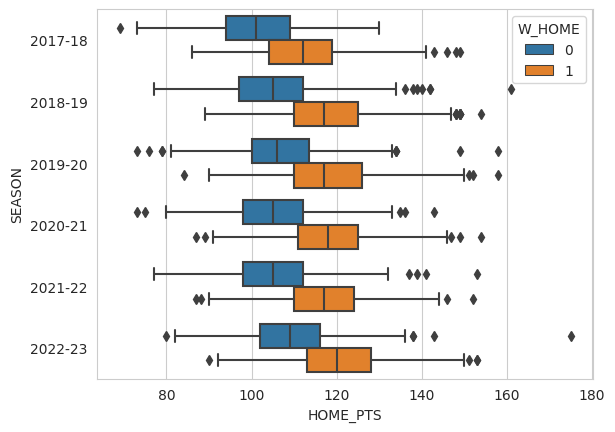

In [12]:
# partidos donde gano como local
home_winers=nba_df[nba_df.W_HOME==1][['SEASON', 'HOME', 'HOME_PTS', 'W_HOME']]
home_winers.columns=['SEASON', 'TEAM', 'POINTS','WINS']

# partidos donde gano como visitante
away_winers=nba_df[nba_df.W_AWAY==1][['SEASON', 'AWAY', 'AWAY_PTS', 'W_AWAY']]
away_winers.columns=['SEASON', 'TEAM', 'POINTS', 'WINS']

#unimos ambos dataframe
games_df=pd.concat([home_winers, away_winers])

sns.boxplot(data=nba_df, x='HOME_PTS', y='SEASON', hue='W_HOME')

# **Desarrollo Modelos para proyeccion**


## **Manipulacion de datos**
---
calculamos las estadisticas promedio del equipo local y visitante para los partidos jugados en los ultimos n dias y la aplicamos a todo el dataframe

In [13]:
#funcion para calcular las estadisticas de los partidos de los ultimos x dias
def estadisticas_partidos_anteriores(game_stats, home, away, game_date, period):
  df_home_games=game_stats[(game_stats['HOME']==home) & (game_stats['DATE']>=game_date-period)& (game_stats['DATE']<game_date)].filter(like='HOME')
  df_away_games=game_stats[(game_stats['AWAY']==home) & (game_stats['DATE']>=game_date-period)& (game_stats['DATE']<game_date)].filter(like='AWAY')
  df_away_games.columns = df_away_games.columns.str.replace('AWAY', 'HOME')
  home_stats=pd.concat([df_home_games, df_away_games]).drop(columns = ['HOME'])

  df_home_games=game_stats[(game_stats['HOME']==away) & (game_stats['DATE']>=game_date-period)& (game_stats['DATE']<game_date)].filter(like='HOME')
  df_home_games.columns = df_home_games.columns.str.replace('HOME', 'AWAY')
  df_away_games=game_stats[(game_stats['AWAY']==away) & (game_stats['DATE']>=game_date-period)& (game_stats['DATE']<game_date)].filter(like='AWAY')
  away_stats=pd.concat([df_home_games, df_away_games]).drop(columns = ['AWAY'])

  mean_stats=pd.concat([home_stats.mean(),away_stats.mean()])
  mean_stats.index=mean_stats.index.str.replace('HOME', 'MEAN_HOME')
  mean_stats.index=mean_stats.index.str.replace('AWAY', 'MEAN_AWAY')
  median_stats=pd.concat([home_stats.median(),away_stats.median()])
  median_stats.index=median_stats.index.str.replace('HOME', 'MEDIAN_HOME')
  median_stats.index=median_stats.index.str.replace('AWAY', 'MEDIAN_AWAY')
  return pd.concat([mean_stats, median_stats])

periodo=datetime.timedelta(days=30)
team_stats=nba_df.apply(lambda x: estadisticas_partidos_anteriores(nba_df, x["HOME"], x["AWAY"], x["DATE"], periodo), axis=1)


agregamos las estadisticas de los partidos anteriores al dataframe donde nos quedamos con la variable a predecir (W_HOME) que dice si gano el equipo local o no.
Ademas borramos los registros que no tengan informacion de partidos anteriores

In [14]:
mean_home_stats=team_stats.filter(like='MEAN_HOME')
mean_home_stats.columns=mean_home_stats.columns.str.replace('MEAN_HOME', 'MEAN_DIFF')
mean_away_stats=team_stats.filter(like='MEAN_AWAY')
mean_away_stats.columns=mean_away_stats.columns.str.replace('MEAN_AWAY', 'MEAN_DIFF')


median_home_stats=team_stats.filter(like='MEDIAN_HOME')
median_home_stats.columns=median_home_stats.columns.str.replace('MEDIAN_HOME', 'MEDIAN_DIFF')
median_away_stats=team_stats.filter(like='MEDIAN_AWAY')
median_away_stats.columns=median_away_stats.columns.str.replace('MEDIAN_AWAY', 'MEDIAN_DIFF')

diff_stats=pd.concat([team_stats, mean_home_stats-mean_away_stats, median_home_stats-median_away_stats], axis=1)

last_game_stats=pd.concat([nba_df[['MATCHID', 'DATE', 'HOME', 'AWAY', 'W_HOME']], diff_stats], axis=1)
last_game_stats.info()
last_game_stats=last_game_stats[(last_game_stats['W_MEDIAN_DIFF'].notnull()) & (last_game_stats['W_MEAN_DIFF'].notnull())]
last_game_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Columns: 113 entries, MATCHID to MEDIAN_DIFF_PTS
dtypes: datetime64[ns](1), float64(108), int64(2), object(2)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6951 entries, 0 to 7058
Columns: 113 entries, MATCHID to MEDIAN_DIFF_PTS
dtypes: datetime64[ns](1), float64(108), int64(2), object(2)
memory usage: 6.0+ MB


In [15]:
last_game_stats.reset_index()
last_game_stats.index=pd.RangeIndex(start=0, stop=6951, step=1)

##**One Hot Encoding**
---
Utilizamos la variable categorica "HOME" y "AWAY" y la transformamos a numerica

In [16]:
for team in last_game_stats['HOME'].unique():
  last_game_stats['IS_HOME_'+team]=last_game_stats['HOME']==team

for team in last_game_stats['AWAY'].unique():
  last_game_stats['IS_AWAY_'+team]=last_game_stats['AWAY']==team

In [17]:
last_game_stats.head()

,MATCHID,DATE,HOME,AWAY,W_HOME,W_MEAN_HOME,MEAN_HOME_FG,MEAN_HOME_FGA,MEAN_HOME_FG_PCT,MEAN_HOME_FG3,...,IS_AWAY_Nets,IS_AWAY_Trail Blazers,IS_AWAY_Mavericks,IS_AWAY_Knicks,IS_AWAY_Clippers,IS_AWAY_Celtics,IS_AWAY_Kings,IS_AWAY_Rockets,IS_AWAY_Bucks,IS_AWAY_Nuggets
0,21701214,2018-04-10,Hawks,76ers,0,0.266667,38.400000,86.666667,0.445400,12.266667,...,False,False,False,False,False,False,False,False,False,False
1,21701202,2018-04-08,Celtics,Hawks,0,0.615385,36.846154,82.769231,0.445462,10.384615,...,False,False,False,False,False,False,False,False,False,False
2,21701184,2018-04-06,Wizards,Hawks,0,0.357143,40.214286,84.642857,0.476214,9.785714,...,False,False,False,False,False,False,False,False,False,False
3,21701172,2018-04-04,Hawks,Heat,0,0.142857,37.857143,86.214286,0.440929,11.785714,...,False,False,False,False,False,False,False,False,False,False
4,21701158,2018-04-03,Heat,Hawks,1,0.571429,42.285714,89.857143,0.471286,12.000000,...,False,False,False,False,False,False,False,False,False,False


# **Modelos Machine Learnings**
---
Probaremos algunos modelos para ver cual tiene mejores resultados
La variable a predecir es una variable categorica (1, 0)

###Separamos el data set para entrenar y probar los modelos

In [18]:
data=last_game_stats
# Elegimos la variable objetivo
X = data.drop(columns=['MATCHID', 'DATE', 'HOME', 'AWAY', 'W_HOME'])
y = data['W_HOME']

# Dividir los datos en conjuntos de entrenamiento validacion y prueba
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify = y_trainval, random_state=42)

### **Modelos elegidos para evaluar**

In [20]:
# Lista de modelos a comparar y sus parámetros
model_lr = LogisticRegression()
model_random_forest = RandomForestClassifier()
model_xgboost = XGBClassifier(seed=100)
model_svc = SVC(C=100,kernel='rbf',random_state=42)

models = [
    ("Logistic Regresion", model_lr),
    ("Random Forest", model_random_forest),
    ("XGBoost", model_xgboost),
    ("SVC", model_svc)
]

###Comparación de modelos utilizando cross validation con la metrica de f1 score

In [21]:
data=last_game_stats
# Elegimos la variable objetivo
X = data.drop(columns=['MATCHID', 'DATE', 'HOME', 'AWAY', 'W_HOME'])
y = data['W_HOME']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [22]:
n_folds = 5  # Número de folds (pliegues)
results = [] # para guardar los resultados

# probamos cross validation en cada uno de los modelos
for model_name, model in models:
    start_time = time.time()  # Registro el tiempo de inicio

    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='f1')
    avg_f1 = scores.mean() # el promedio de F1
    std_f1 = scores.std()  # La desviación estándar de F1

    end_time = time.time()  # Registro el tiempo de finalización
    elapsed_time = end_time - start_time  # Calculo el tiempo transcurrido

    results.append({'Modelo': model_name, 'Promedio F1': avg_f1, 'Desviación Estándar F1': std_f1, 'Tiempo procesamiento': elapsed_time})

# guardamos y mostramos los resultados
df_cross_validation = pd.DataFrame(results)
print(df_cross_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

               Modelo  Promedio F1  Desviación Estándar F1  \
0  Logistic Regresion     0.685322                0.012249   
1       Random Forest     0.676273                0.002712   
2             XGBoost     0.658828                0.009594   
3                 SVC     0.698666                0.010996   

   Tiempo procesamiento  
0              0.484059  
1             12.654133  
2              6.703285  
3             10.287777  


###Mejor modelo evaluado: **Random Forest**
Los modelos tienen un desempeño similar, random forest es el que mejor resultado obtuvo y menor desviacion estandar en la metrica de f1 score

# **Mejoras modelos**

## PCA

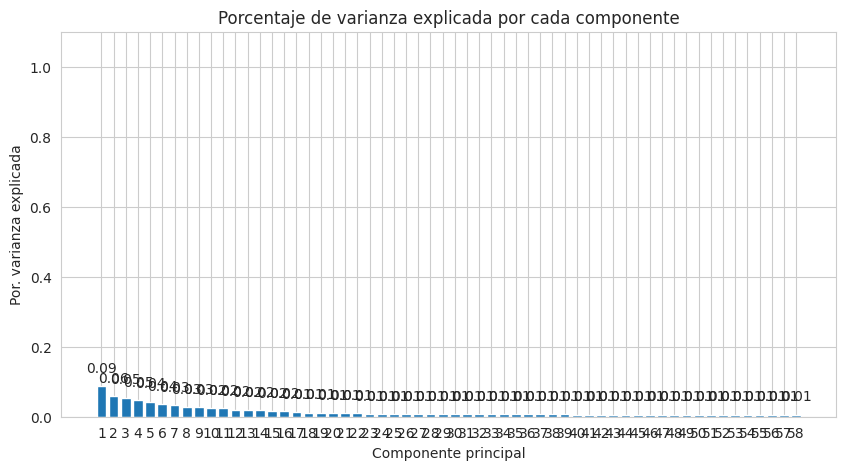

In [23]:
# Preprocesado y modelado

datos = X_train
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# seteamos el porcentaje de varianza que queremos quedarnos y elegimos los componentes que me garanticen
limite_varianza=0.85
varianza_componentes=0
componente=0
while varianza_componentes<limite_varianza:
  varianza_componentes+=modelo_pca.explained_variance_ratio_[componente]
  componente+=1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.bar(x= np.arange(componente) + 1,height = modelo_pca.explained_variance_ratio_[0:componente])
for x, y in zip(np.arange(componente) + 1, modelo_pca.explained_variance_ratio_[0:componente]):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(componente) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [24]:
# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicando PCA
pca = PCA(n_components=componente)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# colocamos nombre de columnas a las generadas
nombres_columnas = [f'PC{i+1}' for i in range(componente)]

X_train = pd.DataFrame(data=X_train, columns=nombres_columnas)
X_test = pd.DataFrame(data=X_test, columns=nombres_columnas)

###Comparación de modelos utilizando cross validation con la metrica de f1 score

In [25]:
#validamos los modelos con cross validation

n_folds = 5  # Número de folds (pliegues)
results = [] # para guardar los resultados

# probamos cross validation en cada uno de los modelos
for model_name, model in models:
    start_time = time.time()  # Registro el tiempo de inicio

    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='f1')
    avg_f1 = scores.mean() # el promedio de F1
    std_f1 = scores.std()  # La desviación estándar de F1

    end_time = time.time()  # Registro el tiempo de finalización
    elapsed_time = end_time - start_time  # Calculo el tiempo transcurrido

    results.append({'Modelo': model_name, 'Promedio F1': avg_f1, 'Desviación Estándar F1': std_f1, 'Tiempo procesamiento': elapsed_time})

# guardamos y mostramos los resultados
df_cross_validation = pd.DataFrame(results)
print(df_cross_validation)

               Modelo  Promedio F1  Desviación Estándar F1  \
0  Logistic Regresion     0.687304                0.007325   
1       Random Forest     0.676629                0.005748   
2             XGBoost     0.650312                0.009977   
3                 SVC     0.645741                0.011211   

   Tiempo procesamiento  
0              0.125485  
1             15.313344  
2              7.904166  
3             10.838374  


###Mejor modelo evaluado: **Random Forest**
Luego de las mejoras realizadas los modelos no tuvieron cambios en la metricas, random forest sigue siendo el modelo con mejor resultado pero la regresion logistica obtuvo resultados casi identicos

##Hypertuning

In [69]:
#Listamos los hiperparametros que seran evaluados

# Random Forest
rf_param_space = {
    'n_estimators': (10, 150, 250),           # Rango para el número de estimadores
    'max_depth': (1, 15),                # Rango para max_depth, profundidad máxima del árbol
    'min_samples_split': (2, 20),        # Rango para min_samples_split, número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': (1, 20)          # Rango para min_samples_leaf, número mínimo de muestras requeridas en un nodo hoja
}

# Regresión Logística
rl_param_space = {
    'C': (0.001, 10),                                                          # Rango para el parámetro de regularización C
    'penalty': ['l2'],                                                         # Elección de tipo de regularización
    'solver': Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])  # Elección de solver
}

# XGBOOST
xgb_param_space = {
    'n_estimators': (25, 50),       # Rango para el número de estimadores
    'max_depth': (3, 5),            # Rango para max_depth, profundidad máxima del árbol
    'learning_rate': (0.05, 0.1),   # Tasa de aprendizaje para evitar el sobreajuste
    'alpha': (0, 0.5),              # Término de regularización L1 en los pesos.
    'subsample': (0.8, 1.0)         # Proporción de muestras utilizadas para entrenar cada árbol
}

# SVM
svm_param_space = {
    'kernel': ['linear', 'rbf', 'poly'],    # tipos de kernel posibles
    'gamma': [0.1, 1, 10],            #Rango de gammas utilizados
    'C': [0.1, 1, 10]           #Rango de penalizacion del error
}

param_spaces = {
    model_lr: rl_param_space,
    model_random_forest: rf_param_space,
    model_xgboost: xgb_param_space,
    model_svc: svm_param_space
}


In [70]:
evaluated_params = []

for model, param_space in param_spaces.items():
    search = RandomizedSearchCV(
        model,
        param_space,
        n_iter=8,
        cv=5,
        n_jobs=-1,
        scoring='f1_macro',
        random_state=42
    )
    search.fit(X_train, y_train)

    best_params = search.best_params_
    best_score = search.best_score_

    # Para registrar los parámetros evaluados
    evaluated_params.append(best_params)

    print(f"Modelo: {model.__class__.__name__}")
    print(f"Mejores Hiperparámetros: {best_params}\n")

# Para verificar si hay duplicados en los parámetros evaluados
duplicates = [params for params in evaluated_params if evaluated_params.count(params) > 1]
print("Duplicados en los parámetros evaluados:", duplicates)


Modelo: LogisticRegression
Mejores Hiperparámetros: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

Modelo: RandomForestClassifier
Mejores Hiperparámetros: {'n_estimators': 150, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 15}

Modelo: XGBClassifier
Mejores Hiperparámetros: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'alpha': 0}

Modelo: SVC
Mejores Hiperparámetros: {'kernel': 'linear', 'gamma': 0.1, 'C': 1}

Duplicados en los parámetros evaluados: []


In [71]:
# Lista de modelos a comparar y sus parámetros
model_lr_ht = LogisticRegression(**evaluated_params[0])
model_random_forest_ht = RandomForestClassifier(**evaluated_params[1])
model_xgboost_ht = XGBClassifier(**evaluated_params[2])
model_svc_ht = SVC(**evaluated_params[3])

models_ht = [
    ("Logistic Regresion", model_lr_ht),
    ("Random Forest", model_random_forest_ht),
    ("XGBoost", model_xgboost_ht),
    ("SVC", model_svc_ht)
]

In [40]:
#validamos los modelos con cross validation

n_folds = 5  # Número de folds (pliegues)
results = [] # para guardar los resultados

# probamos cross validation en cada uno de los modelos
for model_name, model in models_ht:
    start_time = time.time()  # Registro el tiempo de inicio

    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='f1')
    avg_f1 = scores.mean() # el promedio de F1
    std_f1 = scores.std()  # La desviación estándar de F1

    end_time = time.time()  # Registro el tiempo de finalización
    elapsed_time = end_time - start_time  # Calculo el tiempo transcurrido

    results.append({'Modelo': model_name, 'Promedio F1': avg_f1, 'Desviación Estándar F1': std_f1, 'Tiempo procesamiento': elapsed_time})

# guardamos y mostramos los resultados
df_cross_validation = pd.DataFrame(results)
print(df_cross_validation)

               Modelo  Promedio F1  Desviación Estándar F1  \
0  Logistic Regresion     0.669604                0.009524   
1       Random Forest     0.693035                0.004925   
2             XGBoost     0.681329                0.003730   
3                 SVC     0.689031                0.003639   

   Tiempo procesamiento  
0              0.137218  
1             21.320181  
2              3.180165  
3             30.007962  


# Seleccion del modelo final: **Random Forest**

Utilizamos el modelo que mejores resultados arrojo y lo entrenamos con el conjunto de datos de train completo y evaluamos.
Se muestran las metricas principales

Precisión del modelo Random Forest: 0.6362329259525521
              precision    recall  f1-score   support

           0       0.62      0.42      0.50       605
           1       0.64      0.80      0.71       786

    accuracy                           0.64      1391
   macro avg       0.63      0.61      0.61      1391
weighted avg       0.63      0.64      0.62      1391



<Axes: >

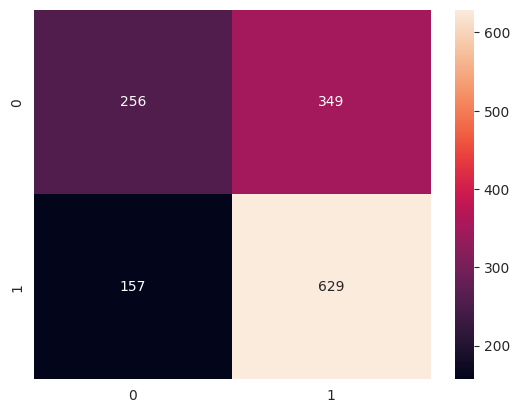

In [73]:
#predicting result
best_model_name, best_model = models_ht[1]

best_model.fit(X=X_train,y=y_train)
Y_pred_bm = best_model.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, Y_pred_bm)
print(f"Precisión del modelo {best_model_name}: {precision}")

# Otros indicadores de rendimiento del modelo
print(classification_report(y_test, Y_pred_bm))

# Matriz de confusion
cm = confusion_matrix(y_test, Y_pred_bm)

sns.heatmap(cm, annot=True,fmt='d')